In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.conv_learner import *
from fastai.transforms import *
from resnet import Resnet56

stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))
sz = 32
bs = 128
wd=1e-5

In [2]:
def get_data(sz, bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=transforms_side_on, pad=4, pad_mode=0)
    data = ImageClassifierData.from_paths('cifar', bs=bs, tfms=tfms,
                                          val_name='test')
    return data

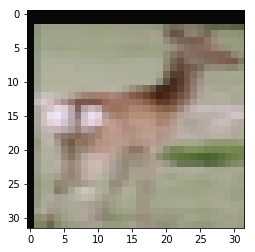

In [38]:
data = get_data(32, 32)
x,y = next(iter(data.trn_dl))
plt.imshow(data.trn_ds.denorm(x)[0]);

In [4]:
learn = ConvLearner.from_model_data(Resnet56(), get_data(32, bs))

In [5]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 16, 32, 32]),
                           ('trainable', True),
                           ('nb_params', 432)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 16, 32, 32]),
                           ('output_shape', [-1, 16, 32, 32]),
                           ('trainable', True),
                           ('nb_params', 32)])),
             ('Conv2d-3',
              OrderedDict([('input_shape', [-1, 16, 32, 32]),
                           ('output_shape', [-1, 16, 32, 32]),
                           ('trainable', True),
                           ('nb_params', 2304)])),
             ('BatchNorm2d-4',
              OrderedDict([('input_shape', [-1, 16, 32, 32]),
                           ('output_shape', [-1, 16, 32, 32]),
                           ('trainable', True),
                           ('nb_params', 32)]

In [8]:
learn.lr_find()

 99%|█████████▉| 389/391 [00:30<00:00, 21.93it/s, loss=19.1]

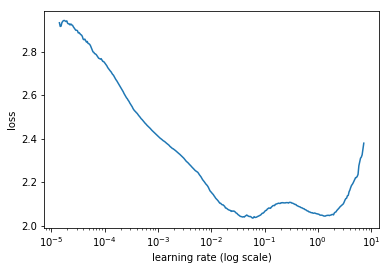

 99%|█████████▉| 389/391 [00:50<00:00, 21.93it/s, loss=19.1]

In [9]:
learn.sched.plot()

In [73]:
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.724016   1.681424   0.3686    
    1      1.613947   1.564028   0.4181                     
    2      1.534609   1.448391   0.4669                     
    3      1.440329   1.374393   0.4933                     
    4      1.388554   1.322226   0.5157                     


[array([1.32223]), 0.5157]

In [10]:
learn.fit(1e-1, 10, cycle_len=4, wds=wd)

epoch      trn_loss   val_loss   accuracy                   
    0      1.779904   1.841964   0.3014    
    1      1.513414   1.488388   0.442                      
    2      1.306682   1.254566   0.5391                     
    3      1.196062   1.163961   0.574                      
    4      1.225488   1.325827   0.5373                     
    5      0.965889   1.103393   0.6301                      
    6      0.766495   0.785406   0.7325                      
    7      0.682888   0.699586   0.761                       
    8      0.772286   1.024425   0.6694                      
    9      0.653897   0.809471   0.7403                      
    10     0.534179   0.574949   0.8105                      
    11     0.482692   0.524657   0.8235                      
    12     0.60464    0.688681   0.7721                      
    13     0.509691   0.601974   0.7995                      
    14     0.43215    0.473921   0.8427                      
    15     0.393646   0.455451 

[array([0.3308]), 0.8964]

In [11]:
def plot_trainval(learn):
    fig,ax = plt.subplots(2,1,figsize=(8,12))
    iterations = len(learn.sched.losses)
    epochs = len(learn.sched.val_losses)
    ax[0].plot(np.arange(epochs) *iterations/ epochs,learn.sched.val_losses, label='Validation loss')
    ax[0].plot(np.arange(iterations),learn.sched.losses, label='Training loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='upper right')
    ax[1].plot(np.arange(len(learn.sched.rec_metrics)),learn.sched.rec_metrics)
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')

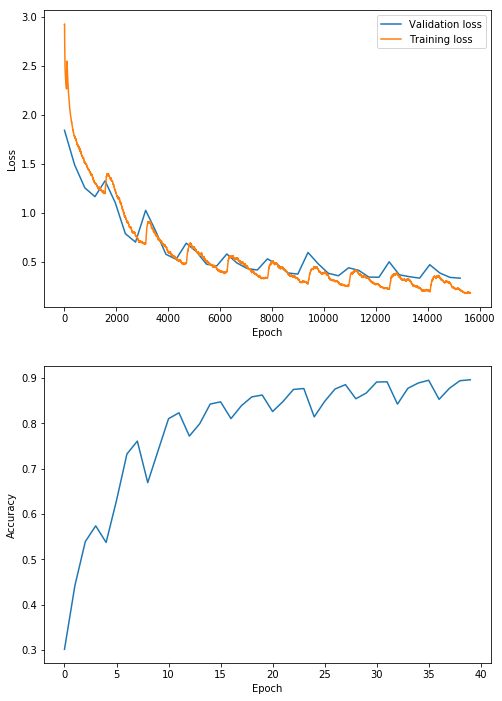

In [12]:
plot_trainval(learn)